In [1]:
import fermionic_mbody as fmb
import numpy as np
import openfermion as of
import sparse 

n, m = 4, 2
d, num, pairs = 2*n, 2*m, False
basis_N = fmb.FixedBasis(d=d, num=num, pairs=pairs)
basis = basis_N

rho_1_arrays = fmb.rho_m_gen(basis, 1)
rho_2_arrays = fmb.rho_m_gen(basis, 2)
#rho_2_kkbar_arrays = fmb.rho_2_kkbar_gen(basis)
#rho_2_block_arrays = fmb.rho_2_block_gen(basis)
#rho_2_block_arrays.shape, rho_2_arrays.shape

ρ_2 (V3.1 Numba): 100%|██████████| 28/28 [00:00<00:00, 1145.08it/s]


In [1]:
import fermionic_mbody as fmb
import scipy 
import numpy as np

basis = fmb.FixedBasis(d=14, num=10, pairs=False)

m = 2 # RDM number
rho_m_arrays = fmb.rho_m_gen(basis, m)

vects = {}
for x in np.linspace(0.1, 4, 20):
    H, mol, inp = fmb.datasets.h2o.generate(r=x)
    H = H[np.ix_(basis.num_ele, basis.num_ele)].real # Basis subspace
    e, v = scipy.sparse.linalg.eigsh(H, k=1, which='SA', tol=1e-8)
    fund = v[:, 0]
    vects[x] = fund
 



ρ_2 (V3.1 Numba): 100%|██████████| 64/64 [00:01<00:00, 40.20it/s]


RDM_2 Direct (Numba): 100%|██████████| 128/128 [00:02<00:00, 55.28it/s]
/tmp/ipykernel_253732/3543902469.py:10: ComplexWarning: Casting complex values to real discards the imaginary part
  res[idx] = np.sort(np.linalg.eigvals(rho))
RDM_2 Direct (Numba): 100%|██████████| 128/128 [00:02<00:00, 56.35it/s]


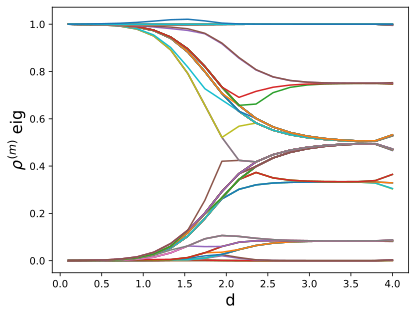

array([[7.21542680e-09, 8.90274772e-09, 8.90275717e-09, ...,
        9.99989175e-01, 9.99999850e-01, 1.00017662e+00],
       [2.69472391e-07, 2.69472436e-07, 2.69472487e-07, ...,
        9.99904297e-01, 9.99998941e-01, 1.00096713e+00],
       [2.41358435e-06, 3.35648715e-06, 3.35648726e-06, ...,
        9.99885493e-01, 9.99994636e-01, 1.00216516e+00],
       ...,
       [2.30945710e-07, 2.38083087e-07, 9.01378995e-07, ...,
        9.99999689e-01, 1.00000000e+00, 1.00000069e+00],
       [7.98621891e-08, 7.98928239e-08, 1.72711342e-05, ...,
        9.99999894e-01, 1.00000000e+00, 1.00000020e+00],
       [2.50628090e-08, 2.53182266e-08, 1.86227178e-03, ...,
        9.99999966e-01, 1.00000000e+00, 1.00000006e+00]])

In [4]:
import matplotlib.pyplot as plt


def plot_rho(vects, rho_arrays, label = r'$\rho^{(m)}$ eig'):
    ds = list(vects.keys())
    res = np.zeros(shape=(len(ds),rho_arrays.shape[0]))
    for idx, d in enumerate(ds):
        vect = vects[d]
        rho = fmb.rho.rho_m_direct(basis, 2, vect)
        res[idx] = np.sort(np.linalg.eigvals(rho))

    plt.plot(ds, res)
    plt.xlabel(r'd', fontsize=16)
    plt.ylabel(label, fontsize=16)
    plt.show()
    return res

plot_rho(vects, rho_m_arrays)

In [4]:
[fmb.rho_m_gen(basis, 2) for x in range(5)]


ρ_2 (V3.1 Numba):  92%|█████████▏| 88/96 [00:02<00:00, 38.02it/s]Process ForkPoolWorker-51:
Process ForkPoolWorker-58:
Process ForkPoolWorker-49:
Process ForkPoolWorker-56:
Process ForkPoolWorker-59:
Process ForkPoolWorker-57:
Process ForkPoolWorker-60:
Process ForkPoolWorker-52:
Process ForkPoolWorker-55:
Process ForkPoolWorker-54:
Process ForkPoolWorker-53:
Process ForkPoolWorker-50:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/home/agus/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  File "/home/agus/anaconda3/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap
    self.run()
  

: 

: 

In [30]:
[rho_m_gen(basis, 2) for x in range(5)]


ρ_2 (V3.1 Numba): 100%|██████████| 96/96 [00:00<00:00, 148.05it/s]


[<COO: shape=(66, 66, 924, 924), dtype=float64, nnz=388080, fill_value=0.0>,
 <COO: shape=(66, 66, 924, 924), dtype=float64, nnz=388080, fill_value=0.0>,
 <COO: shape=(66, 66, 924, 924), dtype=float64, nnz=388080, fill_value=0.0>,
 <COO: shape=(66, 66, 924, 924), dtype=float64, nnz=388080, fill_value=0.0>,
 <COO: shape=(66, 66, 924, 924), dtype=float64, nnz=388080, fill_value=0.0>]

In [8]:
np.all(rho_m_gen(basis, 2).todense() == fmb.rho_m_gen(basis, 2).todense())

ρ_2: 100%|██████████| 12/12 [00:00<00:00, 51.27it/s]


True

In [2]:
from fermionic_mbody._parallel import chunked
from fermionic_mbody.basis import FixedBasis
# Imports from _ofsparse are kept ONLY for specialized rho_2_* generators.
from fermionic_mbody._ofsparse import number_preserving_matrix, restrict_sector_matrix, mask_to_index_map

In [ ]:
# Filename: rho.py
"""
Optimized generators for m-body reduced density-matrix tensors ρ(m) (V3.1 Numba Fixed).
"""

from __future__ import annotations

import itertools
from typing import List, Tuple, Optional, Sequence, Dict, Any

import numpy as np
import openfermion as of
import sparse
from scipy import sparse as sp_sparse 
from multiprocessing import cpu_count
from math import comb
from functools import wraps

# Import Numba and set up fallback
try:
    import numba
    from numba import njit
    USE_NUMBA = True
except ImportError:
    print("Warning: Numba not installed. Falling back to slower Python implementation.")
    USE_NUMBA = False
    # Define a dummy decorator if Numba is missing
    def njit(*args, **kwargs):
        if len(args) > 0 and callable(args[0]):
            return args[0]
        return lambda f: f



__all__ = [
    "rho_m_gen",
    # The specialized functions (rho_2_block_gen, rho_m, etc.) should also be listed 
    # if their implementations are included in the file.
]

# ---------------------------------------------------------------------
# helpers
# ---------------------------------------------------------------------
def _ensure_workers(n_workers: int | None) -> int:
    try:
        return max(1, n_workers or cpu_count())
    except NotImplementedError:
        return 1

# NOTE: Include _restrict_last2 and subspace_aware implementations here if needed for rho_2_* functions.
# They are omitted for brevity but are necessary if rho_2_* functions are retained.



# ---------------------------------------------------------------------
# specialised ρ₂ blocks and contraction helper
# ---------------------------------------------------------------------
# NOTE: The remaining functions (rho_2_block_gen, rho_m, etc.) 
# from the original rho.py should be included here to make the file complete.
# They are omitted here for brevity but are necessary for full functionality.

In [4]:
def pair_condensate_state(basis: fmb.FixedBasis, m_pairs: int) -> np.ndarray:
    d = basis.d
    assert d % 2 == 0
    n_pairs = d // 2
    assert 0 < m_pairs <= n_pairs

    vec = np.zeros(basis.size, complex)

    # iterate over every subset of m time-reversed pairs
    from itertools import combinations

    for combo in combinations(range(n_pairs), m_pairs):
        bitmask = 0
        for k in combo:
            bitmask |= 1 << (2 * k)      # c†_k
            bitmask |= 1 << (2 * k + 1)  # c†_{k̄}
        idx = int(np.where(basis.num_ele == bitmask)[0])
        vec[idx] = 1.0

    vec /= np.linalg.norm(vec)
    return vec.real

def a_dag_state(basis: fmb.FixedBasis, sk_arr: np.ndarray):
    # Generamos los operadores A^\dag
    op = of.FermionOperator.zero()
    for k in range(0, basis.d//2):
        op += sk_arr[k] * of.FermionOperator((2*k, 1)) * of.FermionOperator((2*k+1, 1))
    op = np.prod([op for _ in range(basis.m//2)])
    vect = basis.opr_to_vect(op).real
    print(op)
    return vect * 1/np.linalg.norm(vect)

def partial_traspose(rho, perm):
    d = basis.d//2
    rho_p = np.zeros((d**2, d**2))
    for m in range(d**2):
        for n in range(d**2):
            # Escrimos los índices i j k l en términos de m n
            i, j = m//d, m % d
            k, l = n//d, n % d
            indices = (i, j, k, l)
            ip, jp, kp, lp = tuple(indices[p] for p in perm)
            rho_p[m,n] = rho[ip*d + jp, kp*d + lp]
    return rho_p



def slater_state(basis: fmb.FixedBasis, occupied) -> np.ndarray:
    bitmask = sum(1 << i for i in occupied)
    idx = int(np.where(basis.num_ele == bitmask)[0])
    vec = np.zeros(basis.size, complex)
    vec[idx] = 1.0
    return vec

In [5]:
# Uniforme
sk, lam = 1/np.sqrt(n) * np.ones(n), -1*m*(n+1-2*m)/(n*(n-1))
# Random (solo m=1)
#seed = np.random.uniform(0, 1, n)
#sk, lam = seed/np.linalg.norm(seed), 0

vect = a_dag_state(basis, sk)
#vect = slater_state(basis, np.random.randint(0, basis.d, basis.m))

rho = fmb.rho_m(vect, rho_2_block_arrays)

#rho_pt = partial_traspose(rho, [0, 3, 2, 1]) 
#rho_as = fmb.rho.antisymmetrise_block(rho_pt)
#au = lambda x: np.sort(np.linalg.eigvals(x).real)

#print(sk)
#au(rho_as), lam

0.25 [0^ 1^ 0^ 1^] +
0.25 [0^ 1^ 2^ 3^] +
0.25 [0^ 1^ 4^ 5^] +
0.25 [0^ 1^ 6^ 7^] +
0.25 [2^ 3^ 0^ 1^] +
0.25 [2^ 3^ 2^ 3^] +
0.25 [2^ 3^ 4^ 5^] +
0.25 [2^ 3^ 6^ 7^] +
0.25 [4^ 5^ 0^ 1^] +
0.25 [4^ 5^ 2^ 3^] +
0.25 [4^ 5^ 4^ 5^] +
0.25 [4^ 5^ 6^ 7^] +
0.25 [6^ 7^ 0^ 1^] +
0.25 [6^ 7^ 2^ 3^] +
0.25 [6^ 7^ 4^ 5^] +
0.25 [6^ 7^ 6^ 7^]


In [ ]:
# Filename: rho.py
"""
Optimized generators for m-body reduced density-matrix tensors ρ(m) (V3 Numba).
"""

from __future__ import annotations

import itertools
from typing import List, Tuple, Optional, Sequence, Dict, Any

import numpy as np
import openfermion as of
import sparse
from scipy import sparse as sp_sparse 
from multiprocessing import cpu_count
from math import comb
from functools import wraps

# Import Numba and set up fallback
try:
    import numba
    from numba import njit
    USE_NUMBA = True
except ImportError:
    print("Warning: Numba not installed. Falling back to slower Python implementation.")
    USE_NUMBA = False
    # Define a dummy decorator if Numba is missing
    def njit(*args, **kwargs):
        # Handle both @njit and @njit(cache=True) forms
        if len(args) > 0 and callable(args[0]):
            return args[0]
        return lambda f: f

# Dependencies (Assuming they exist based on the prompt context)
try:
    from ._parallel import chunked
    from .basis import FixedBasis
    # Imports from _ofsparse are kept ONLY for specialized rho_2_* generators.
    from ._ofsparse import number_preserving_matrix, restrict_sector_matrix, mask_to_index_map
except ImportError:
    # Define placeholder types/functions if dependencies are missing
    print("Warning: Dependencies (basis, _parallel, _ofsparse) not found.")
    FixedBasis = Any
    chunked = None
    number_preserving_matrix = None
    restrict_sector_matrix = None
    mask_to_index_map = None


__all__ = [
    "rho_m_gen",
    "rho_2_block_gen",
    "antisymmetrise_block",
    "rho_2_kkbar_gen",
    "rho_m",
]

# ---------------------------------------------------------------------
# helpers (Original helpers kept for compatibility/rho_2_*)
# ---------------------------------------------------------------------
def _ensure_workers(n_workers: int | None) -> int:
    return max(1, n_workers or cpu_count())

# (Include _restrict_last2 and subspace_aware implementations here if needed for rho_2_*)
# Omitted for brevity, assuming they are the same as the original implementations.



# ---------------------------------------------------------------------
# specialised ρ₂ blocks and contraction helper
# ---------------------------------------------------------------------
# NOTE: The remaining functions (rho_2_block_gen, rho_m, etc.) 
# should be included here exactly as they appeared in the original rho.py.
# They are omitted for brevity but are necessary for the file to be complete.
# They remain unoptimized but rely on the (now corrected) _ofsparse.py.